# The examples are from [IBM Quantum Learning](https://learning.quantum.ibm.com/)

## [Single Systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems#qiskit-examples)

### State vectors

In [40]:
from qiskit.quantum_info import Statevector
import numpy as np

In [41]:
u = Statevector([1, 0])
v = Statevector([0, 1])
w = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
x = Statevector([1/np.sqrt(2), 0])

In [42]:
display(u.draw('latex'))
display(v.draw('latex'))
display(w.draw('latex'))
display(x.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Check if these states are valid

In [43]:
print(f'Is u a valid state?: {u.is_valid()}')
print(f'Is x a valid state?: {x.is_valid()}')

# is_valid checks if the vectors have norm 1

Is u a valid state?: True
Is x a valid state?: False


### Simulating measurements

In [44]:
# create a state v
v = Statevector([1+3.0j, -5]/np.sqrt(35))
v.draw('latex')

<IPython.core.display.Latex object>

In [45]:
v.measure()

('0',
 Statevector([0.31622777+0.9486833j, 0.        +0.j       ],
             dims=(2,)))

{'0': 2834, '1': 7166}

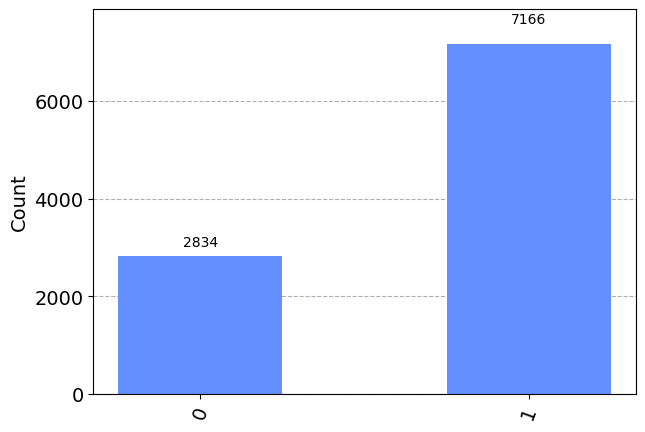

In [46]:
# visualize by histogram
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(10000)
display(statistics)
plot_histogram(statistics)

In [47]:
# let's calulate the actual probability vs the measured probabilities

# empirical probabilities
print(f'The empirical probability of outcome 0 is: {statistics['0']/10000}')
print(f'The empirical probability of outcome 1 is: {statistics['1']/10000} \n')

# actual probabilities
probabilities = v.probabilities()

print(f'The actual probability of outcome 0 is: {probabilities[0]}')
print(f'The actual probability of outcome 1 is: {probabilities[1]}')

The empirical probability of outcome 0 is: 0.2834
The empirical probability of outcome 1 is: 0.7166 

The actual probability of outcome 0 is: 0.28571428571428575
The actual probability of outcome 1 is: 0.7142857142857141


Using `Operator`

In [48]:
from qiskit.quantum_info import Operator
from numpy import sqrt

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

Doing the same thing using a `Quantum Circuit`

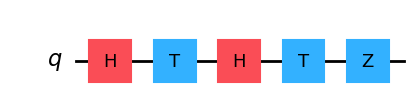

In [49]:
from qiskit import QuantumCircuit

# let us define the circuit first
qc = QuantumCircuit(1)

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.z(0)

qc.draw('mpl')

In [50]:
# now we have to initialize the starting quantum state vector
ket0 = Statevector([1,0])
v = ket0.evolve(qc)
v.draw('text')

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

{'0': 8496, '1': 1504}

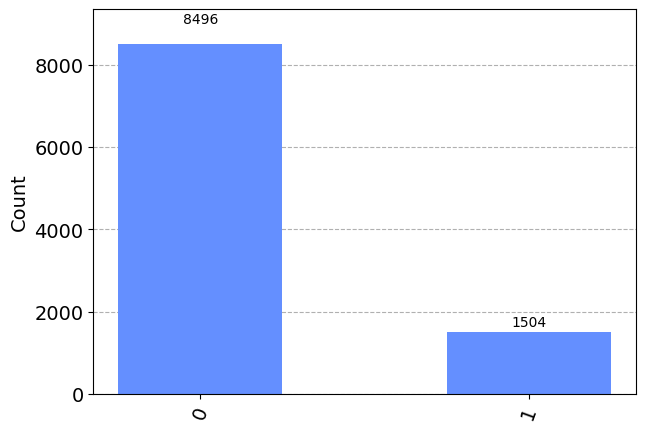

In [51]:
statistics = v.sample_counts(10000)
display(statistics)

plot_histogram(statistics)

## [Multiple systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#qiskit-examples)

State vactors can be initialized using labels

### Tensor products

In [53]:
from qiskit import *
ket0 = Statevector.from_label('0')
ket_plus = Statevector.from_label('+')
display(ket0.draw('latex'))
display(ket_plus.draw('latex'))

# now for multiparty system, we need to perform tensor product
# tensor product of states
psi = ket0.tensor(ket_plus)
display(psi.draw('latex'))

bra0 = ket0.conjugate()
ket1 = Statevector.from_label('1')
bra1 = ket1.conjugate()

# tensor product of operators
I = Operator.from_label('I')
X = Operator.from_label('X')
Y = Operator([[0, -1.0j], [1.0j, 0]])
display(X.tensor(Y).draw('latex'))


# evolve
v = psi.evolve(X.tensor(Y))
display(v.draw('latex'))

# Controlled-X gate
CX = Operator(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
    ]
)

display(psi.evolve(CX).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## [Quantum Circuits](https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits#quantum-circuits)

In [79]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

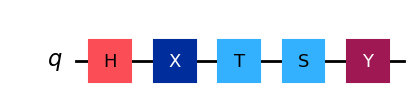

In [55]:
# let's create a quantum circuit with single quantum register
qc = QuantumCircuit(1) # here 1 represents the number of qubits
qc.h(0)
qc.x(0)
qc.t(0)
qc.s(0)
qc.y(0)

display(qc.draw('mpl'))

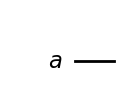

In [62]:
# we can change the default name of quantum register
register = QuantumRegister(1, "a") # here we name the register
qc_a = QuantumCircuit(register) # then we convert the register to a quantum circuit
display(qc_a.draw('mpl'))

In [63]:
qc_a.h(0)
qc_a.x(0)
qc_a.t(0)

display(qc_a.draw('text'))

┌───┐┌───┐┌───┐
a: ┤ H ├┤ X ├┤ T ├
   └───┘└───┘└───┘

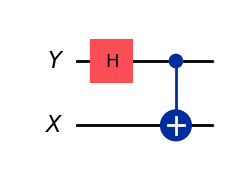

In [68]:
# another quantum circuit with 2 qubits
register1 = QuantumRegister(1, "Y")
register2 = QuantumRegister(1, "X")

qc = QuantumCircuit(register1, register2)

qc.h(0)
qc.cx(0, 1)

display(qc.draw('mpl'))

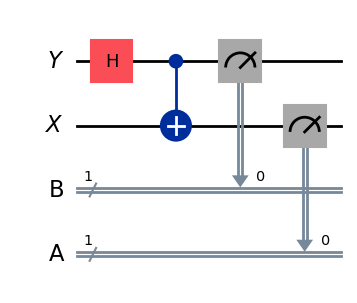

In [70]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw('mpl'))

{'00': 0.4999999999999999, '11': 0.4999999999999999}

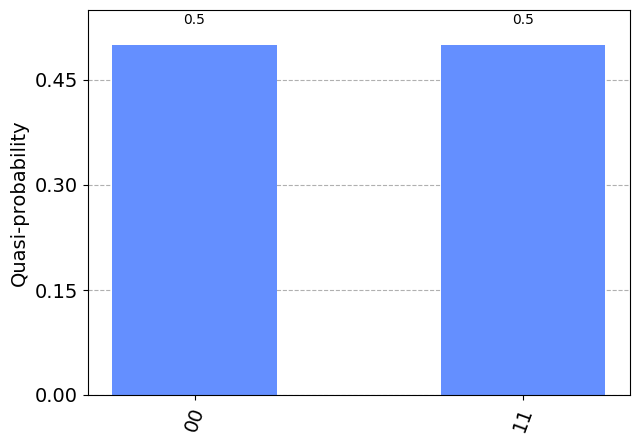

In [87]:
# learning about sampler primitive
results = Sampler().run(circuit).result()
# print(Sampler().run(circuit))
statistics = results.quasi_dists[0].binary_probabilities()
display(statistics)
display(plot_histogram(statistics))

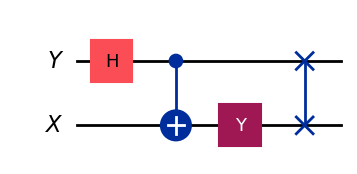

In [95]:
reg_1 = QuantumRegister(1, "X")
reg_2 = QuantumRegister(1, "Y")

circuit = QuantumCircuit(reg_2, reg_1)
circuit.h(0)
circuit.cx(0,1)
circuit.y(1)
circuit.swap(0,1)

display(circuit.draw('mpl'))

## [Entanglement in action](https://learning.quantum.ibm.com/course/basics-of-quantum-information/entanglement-in-action#qiskit-implementation)